# Credit EDA Assignment

In this case study/assignment we aim to analyize the provided dataset and to find the patterns to indicate if user is able to pay his installments which should help bank to take various business decisions regarding loan application of a client.

As we have 2 datasets provided to use "application_data.csv" and "previous_application.csv" which denote current application and previous application history of a client.
The general steps we will be following will be:
- Data cleaning of current application
- analyzing the current application data individually to get idea what we are in for
- Data cleaning of previous application
- analyzing the previous application data individually 
- Merging these two data sets and analyzing it to see the full picture

#### Importing the libraries we will be using for analysis

In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

## Importing and understanding application data

In [3]:
app_df = pd.read_csv("application_data.csv")

lets see if we were successful

In [4]:
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


lets see the shape of data we have

In [5]:
app_df.shape

(307511, 122)

<b>Observation</b>: From column description and the current application data, we can see there is <b>TARGET</b> column, which shows if client is with payment difficulties (as per various logical threshold values). So it seems this is one of important columns against which we will be creating patterns

In [6]:
app_df.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

<b>Initial observation of target column:</b>
<p>It seems there are no empty or irrelevant values and this column have proper values.</p>
<p>Also, entries with payment difficulties (target=1) are less compared to client with no-payment difficulties. This should be good to get positive business decisions also, like which should be our preferred target client pattern</p>

## Data Cleaning on application-data

As part of Data Cleanup we would be taking multiple steps (if needed) such as data type conversion, handling missing values, handling outliers, standardizing values etc.

### Column type checking

Lets try to explore columns from both data sets to see if those need any type fixing

In [7]:
# lets check application data first
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


above command is not showing all columns info properly, lets see verbose info

In [8]:
app_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

After observing application data sets's columns info, comparing that with column description in provided file and sample rows from dataset,
we can say that all column have correct data types i.e. numerical columns are marked int or float etc. (in case if we missed anything here, we will tackle that in upcoming steps where we process individual columns)

### Missing value checkup/handling for current application data

Here we will be checking all columns with empty values one by one and will be tackling various situations as per column description, values present, type of values, outliers and need.

Tackling both data sets would get tricky and lengthy for single section, so lets handle current application data first

In [9]:
# lets see columns who have null values
app_df.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

oh.. too many null values.. lets try to see columns with null values only.. easier to tackle

In [10]:
app_df.columns[app_df.isna().any()]

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMI

lets see null values too

In [11]:
col_nas = app_df[app_df.columns[app_df.isnull().any()]].isnull().sum()

#lets see which columns have most empty values
col_nas.sort_values(ascending=False)

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MEDI    213514
NONLIVINGAPARTMENTS_MODE    213514
                             ...  
EXT_SOURCE_2                   660
AMT_GOODS_PRICE                278
AMT_ANNUITY                     12
CNT_FAM_MEMBERS                  2
DAYS_LAST_PHONE_CHANGE           1
Length: 67, dtype: int64

In [12]:
# lets analyize the column with most empty values first, which is "COMMONAREA_MEDI"

In [13]:
app_df["COMMONAREA_MEDI"].describe()

count    92646.000000
mean         0.044595
std          0.076144
min          0.000000
25%          0.007900
50%          0.020800
75%          0.051300
max          1.000000
Name: COMMONAREA_MEDI, dtype: float64

In [14]:
app_df["COMMONAREA_MEDI"].shape

(307511,)

<b>Observation:</b>
<p>
    this column is of type float, and as per the description of this column its a normalized information about various factors like age of building, number of elevators, entrances, state of building, no. of floors etc etc.
</p>
<p>
    In addition, considering this column have empty values 214865 out of 307511 (almost 70%)
    so I guess there is no point in keeping this column if its not going to help in analysis that much.
</p>

<b>As per above observation:</b>
<p>
    By thinking of pros and cons from above observation, as per my understanding it'll be better if we drop such columns who are derived, are not a golden source of information and have too many empty values
</p>

<b>But this is the situation we saw in single column</b>, Lets try to get idea of more columns before we decide about dropping empty values


In [15]:
na_perctg = app_df[app_df.columns[app_df.isnull().any()]].isnull().sum() * 100 / app_df.shape[0]
na_perctg

AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
OWN_CAR_AGE                   65.990810
OCCUPATION_TYPE               31.345545
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 67, dtype: float64

<AxesSubplot:>

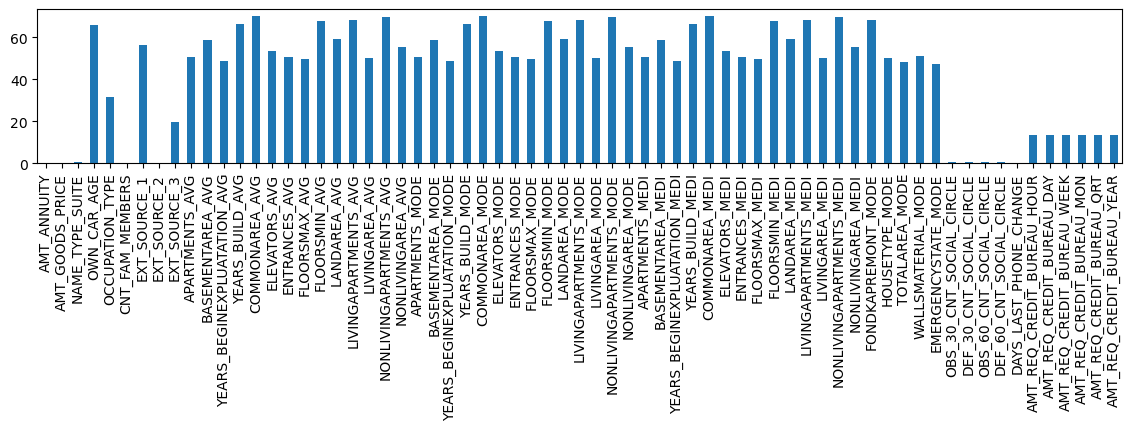

In [16]:
plt.figure(figsize=[14, 2])
na_perctg.plot(kind="bar")

In [17]:
app_df["OWN_CAR_AGE"].describe()

count    104582.000000
mean         12.061091
std          11.944812
min           0.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          91.000000
Name: OWN_CAR_AGE, dtype: float64

In [18]:
app_df["OWN_CAR_AGE"].shape

(307511,)

<b>Observation:</b>
<p>
    After checking above values, we can say many of the columns above having more than 40-50% of percentage of empty values, are deried columns etc, not a golden source of information
</p>
<p>
    Except column like <b>OWN_CAR_AGE</b>, but as that column can be made exception because the empty value of that column too high, <b>66%</b>.
</p>

<b>As per above few observations and due dilligence</b>
lets drop columns having empty values more than 40% for now, later if needed more insights we will try to change this and increase percentage

<b>Lets drop columns with empty percentage above 40%</b>

In [19]:
app_df = app_df[app_df.columns[app_df.isnull().mean() < 0.4]]

Lets confirm success of our operation

In [20]:
app_df.shape

(307511, 73)

In [21]:
app_df.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 73, dtype: int64

<AxesSubplot:>

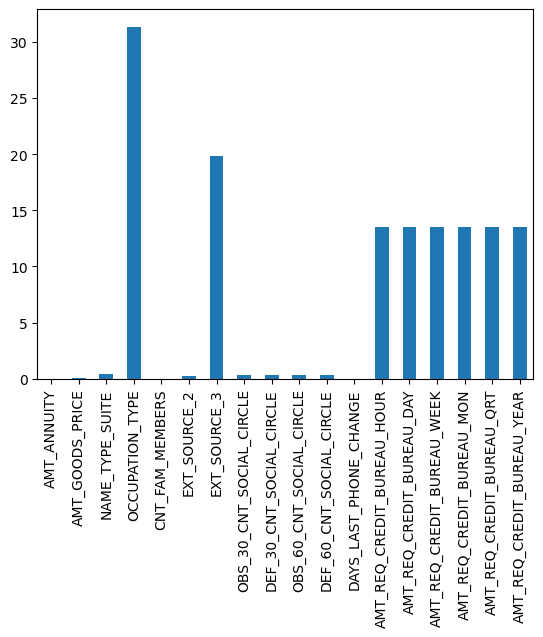

In [22]:
# Now lets see what and how much columns are remained with empty values, in percentage
na_perctg = app_df[app_df.columns[app_df.isnull().any()]].isnull().sum() * 100 / app_df.shape[0]
na_perctg.plot.bar()

In [23]:
# Lets see what column have most empty values

app_df.isna().sum().sort_values(ascending=False)

OCCUPATION_TYPE                96391
EXT_SOURCE_3                   60965
AMT_REQ_CREDIT_BUREAU_YEAR     41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_MON      41519
                               ...  
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
TARGET                             0
REG_CITY_NOT_LIVE_CITY             0
Length: 73, dtype: int64

Now column with most empty values is <b>OCCUPATION_TYPE</b> column, but as we can guess this column shows occupation of user...
So this is important data for analysis, And this is something we can not drop or impute from other columns.
So lets keep that column as is, we'll try to tackle any situation if arises later as per future scenario.

In [24]:
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


<b>Observation:</b>
<p>Next most empty value's column in the empty value's bar chart is <b>EXT_SOURCE_3</b> </p>
<p>But after checking column description and data, we say this column have no use in analysis. Not with current application data and it have no relation with previous application data as well.</p>
<br>
<p>Above observation takes us to a another step in investigation, we need to find and remove redundant columns</p>

### Remove redundant columns

<p>After initial observation of column definitions I can see there are <b>3</b> redundant columns with name pattern "<b>EXT_SOURCE_*</b>" and <b>20</b> columns with name pattern "<b>FLAG_DOCUMENT_*</b>"</p>
<p>As these columns have no use in current application as well as in previous application dataset, lets drop them</p>

In [25]:
print(app_df.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [26]:
# lets first validate our regex, so we do not remove unwanted columns
ext_source_cols = list(app_df.filter(regex='EXT_SOURCE_*'))
print(ext_source_cols)

['EXT_SOURCE_2', 'EXT_SOURCE_3']


<p>Above command returned 2 "EXT_SOURCE_*" columns, because as we can see in above all column's list, "EXT_SOURCE_1" column was already removed in earlier cleanups</p>

In [27]:
# lets check "FLAG_DOCUMENT_*"
flag_doc_cols = list(app_df.filter(regex='FLAG_DOCUMENT_*'))
print(flag_doc_cols)
print("Total flag document columns are: ", len(flag_doc_cols))

['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
Total flag document columns are:  20


In [28]:
# lets get rid of these ext_source and flag_doc columns

app_df.drop(columns=ext_source_cols, inplace=True)
app_df.drop(columns=flag_doc_cols, inplace=True)

In [29]:
# lets verify
print(app_df.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_S

In [30]:
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# lets see how many missing value columns remained to be treated
app_df.isna().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

Lets check "AMT_ANNUITY"

In [32]:
app_df.AMT_ANNUITY.head()

0    24700.5
1    35698.5
2     6750.0
3    29686.5
4    21865.5
Name: AMT_ANNUITY, dtype: float64

In [33]:
app_df[app_df.AMT_ANNUITY.isna()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
47531,155054,0,Cash loans,M,N,N,0,180000.0,450000.0,NaN,...,0.0,1.0,0.0,-2.0,0.0,0.0,0.0,0.0,1.0,1.0
50035,157917,0,Cash loans,F,N,N,0,94500.0,450000.0,NaN,...,0.0,0.0,0.0,-706.0,0.0,0.0,0.0,1.0,0.0,1.0
51594,159744,0,Cash loans,F,N,N,0,202500.0,539100.0,NaN,...,0.0,1.0,0.0,-199.0,0.0,0.0,0.0,1.0,0.0,1.0
55025,163757,0,Cash loans,F,N,N,0,162000.0,296280.0,NaN,...,0.0,0.0,0.0,-2841.0,0.0,0.0,0.0,1.0,0.0,4.0
59934,169487,0,Cash loans,M,Y,N,0,202500.0,360000.0,NaN,...,0.0,0.0,0.0,-743.0,0.0,0.0,1.0,0.0,0.0,6.0
75873,187985,0,Cash loans,M,Y,N,0,144000.0,219249.0,NaN,...,0.0,0.0,0.0,-1986.0,0.0,0.0,0.0,0.0,0.0,11.0
89343,203726,0,Cash loans,F,Y,N,0,90000.0,157500.0,NaN,...,0.0,0.0,0.0,-348.0,0.0,0.0,0.0,2.0,0.0,0.0
123872,243648,0,Cash loans,F,N,Y,0,202500.0,929088.0,NaN,...,0.0,0.0,0.0,-1331.0,0.0,0.0,0.0,0.0,1.0,5.0
207186,340147,0,Cash loans,M,N,N,0,171000.0,486000.0,NaN,...,0.0,0.0,0.0,-295.0,0.0,0.0,1.0,1.0,0.0,2.0
227939,364022,0,Cash loans,F,N,Y,0,315000.0,628069.5,NaN,...,0.0,1.0,0.0,-1255.0,0.0,0.0,1.0,0.0,0.0,2.0


In [34]:
app_df.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

<AxesSubplot:>

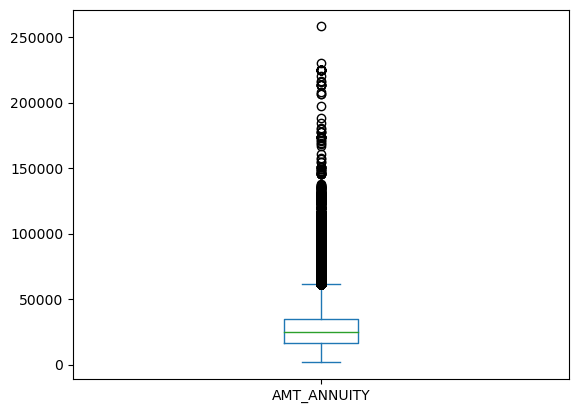

In [35]:
app_df.AMT_ANNUITY.plot.box()

<p>As we can see above from box plot and describe statement, the IQR is very around bottom and outliers are very much spead longer values. So we should fill empty values with median instead of mean. Because mean value is skewed.</p>
<b>Imputing missing value with median</b>

In [36]:
app_df.AMT_ANNUITY = app_df.AMT_ANNUITY.fillna(app_df.AMT_ANNUITY.median())

In [37]:
# lets check empty values again
app_df.isna().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

In [38]:
app_df.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

<AxesSubplot:>

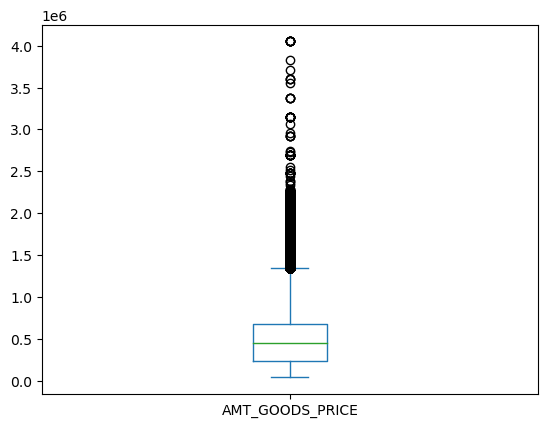

In [39]:
app_df.AMT_GOODS_PRICE.plot.box()

In [40]:
# same as above, replace with median
app_df.AMT_GOODS_PRICE = app_df.AMT_GOODS_PRICE.fillna(app_df.AMT_GOODS_PRICE.median())

In [41]:
# lets check empty values again
app_df.isna().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

<p>Lets handle "NAME_TYPE_SUITE" column for empty values. This column shows who were accompanying the client when he was applying for loan<p>

In [42]:
# lets see what values are present in NAME_TYPE_SUITE
app_df.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [43]:
# lets check these values in normalized form to check relative percentages
app_df.NAME_TYPE_SUITE.value_counts(normalize=True)

Unaccompanied      0.811596
Family             0.131112
Spouse, partner    0.037130
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: NAME_TYPE_SUITE, dtype: float64

<p>As we can see almost 81% people were Unaccompanied while applying for loan.</p>
<p>So my guess for this field's being empty is that, many time people go to apply the loan, and the cleark etc. maybe did not fill this field as there was no one accompanying the client. And as this is the most commonly occuring value lets fill it with that</p>
<p>So here, We are <b>imputing empty value with mode</b></p>

In [44]:
app_df.NAME_TYPE_SUITE = app_df.NAME_TYPE_SUITE.fillna(app_df.NAME_TYPE_SUITE.mode()[0])

In [45]:
app_df.isna().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

Lets see what "OCCUPATION_TYPE" have

In [46]:
app_df.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

<p>"OCCUPATION_TYPE" is something we can not fill with any value on our own from existing values.
But lets replace empty values with some placeholder "UNKNOWN", so that we will get those value in analysis instead of getting NA or skipping row.</p>
<b>Replace missing value with placeholder</b>

In [47]:
app_df.OCCUPATION_TYPE = app_df.OCCUPATION_TYPE.fillna("UNKNOWN")

In [48]:
# lets check null values in percentages
app_df.isnull().sum() * 100 / app_df.shape[0]

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000000
AMT_GOODS_PRICE                 0.000000
NAME_TYPE_SUITE                 0.000000
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

<p>Now all columns have very negligible empty values which we can ignore except enquiry columns AMT_REQ_CREDIT_BUREAU_HOUR to AMT_REQ_CREDIT_BUREAU_YEAR</p>
Lets see what we are in for before we make assumptions

In [49]:
app_df.AMT_REQ_CREDIT_BUREAU_HOUR.describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [50]:
app_df.AMT_REQ_CREDIT_BUREAU_YEAR.describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

Difference between 75% and max seems high, lets try to see box plot to explore

<AxesSubplot:>

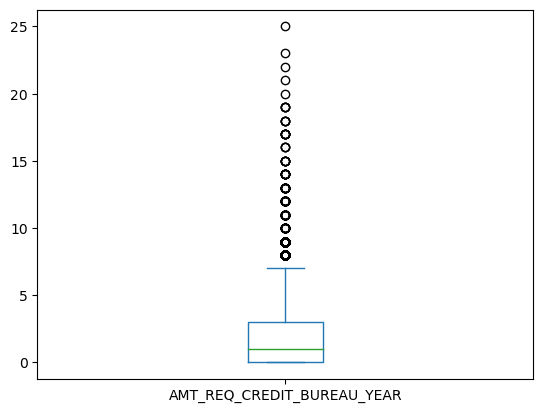

In [51]:
app_df.AMT_REQ_CREDIT_BUREAU_YEAR.plot.box()

<b>observation</b>
<p>As we can see above, few outliers are outside of the IQR, but not at alarming distance. Also, We can assume maybe few clients needed more enquiries, and 25 in a whole year does not seem that much extra.</p>
<p>From above observation, Its safe to say that we can replace empty values with median value</p>

In [52]:
enquiry_cols = ["AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR"]

def fill_with_median(col_name):
    app_df[col_name] = app_df[col_name].fillna(app_df[col_name].median())

list(map(fill_with_median, enquiry_cols))

[None, None, None, None, None, None]

Lets see remaining columns with null values

In [53]:
app_df[app_df.columns[app_df.isnull().any()]].isnull().sum() * 100 / app_df.shape[0]

CNT_FAM_MEMBERS             0.000650
OBS_30_CNT_SOCIAL_CIRCLE    0.332021
DEF_30_CNT_SOCIAL_CIRCLE    0.332021
OBS_60_CNT_SOCIAL_CIRCLE    0.332021
DEF_60_CNT_SOCIAL_CIRCLE    0.332021
DAYS_LAST_PHONE_CHANGE      0.000325
dtype: float64

<p>As we can see now, We have taken care of all the empty value columns with sizable null values and now remaining are the ones with negligible nulls.</p>
<p>The ones with relative big size are "OBS_*" and "DEF_*", but lets ignore those for now and circle back to them if we require those in upcoming steps</p>

lets see now the state of data set we have

In [54]:
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 51 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [56]:
app_df.shape

(307511, 51)

## Analysis of Application data (Uni and Multi variate)

As we have handled data for null values, now lets try to go through various columns to explore and analyize them.

lets start with TARGET column

In [57]:
app_df.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

<p>As the TARGET column is of type <b>categorical unordered</b>, so there is nothing map here But like state at start of this report, this column is important as we would be exploring other columns against this afterwards</p>

Now, lets try to go one by one in columns, to see if there are any columns catch out attention

In [58]:
app_df.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

Lets analyse <b>gender</b> wise data

In [59]:
app_df.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

<b>Observation</b>: There are more females than males who applied for loan

<p><b>Observation</b>: CODE_GENDER column seems to have 4 values with value as "XNA". If we try to guess, maybe someone added that to denote as field not filled, or client did not want to disclose his gender or client does not fall in other two genders.</p>
<p>Replacing "XNA" with null values would be a crime against humanity, So lets consider XNA as a placeholder for now. This is best route for all the standard scenarios like <b>incorrect inputed value, missing value and gender equality</b></p>

Lets analise gender wise defaulters

<AxesSubplot:xlabel='CODE_GENDER', ylabel='count'>

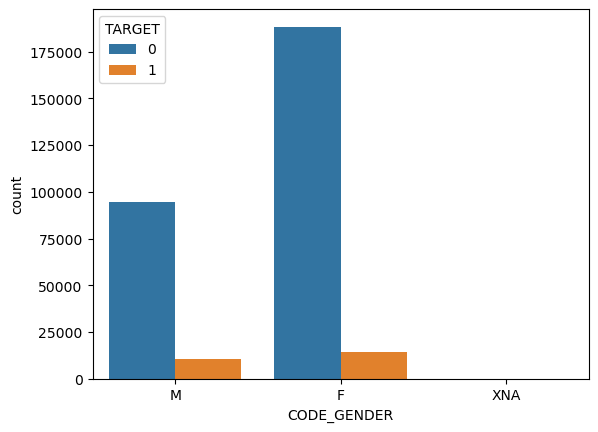

In [66]:
sns.countplot(data = app_df, x = "CODE_GENDER", hue = "TARGET")

<div style="background-color: #dcf5de; padding: 10px"><b style="color: green">Observation Insight</b>: In above chart we can clearly see percentage of Males are more likely to be defaulter than females. In other words females would be better candidate to give loan to.</div>

Lets see what happens with people who <b>own a car</b>

In [69]:
app_df.FLAG_OWN_CAR.value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

<AxesSubplot:xlabel='FLAG_OWN_CAR', ylabel='count'>

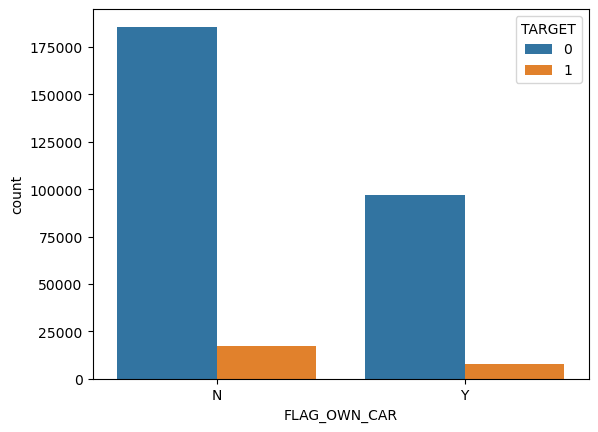

In [70]:
sns.countplot(data = app_df, x = "FLAG_OWN_CAR", hue = "TARGET")

<div style="background-color: #dcf5de; padding: 10px"><b style="color: green">Observation Insight</b>: People who own a car are more in percentage to become defaulter. Not sure why... Do they have too many expenses? Do they show-off things and things which are hidden like credit score they dont care ?</div>

Lets see what happens with people who <b>own a house or flat</b>

<AxesSubplot:xlabel='FLAG_OWN_REALTY', ylabel='count'>

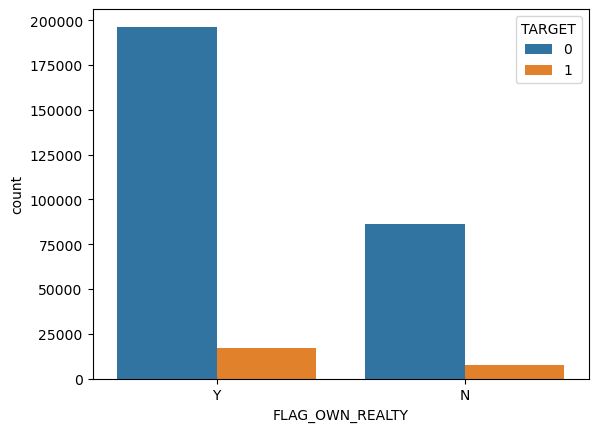

In [71]:
sns.countplot(data = app_df, x = "FLAG_OWN_REALTY", hue = "TARGET")

<div style="background-color: #dcf5de; padding: 10px"><b style="color: green">Observation Insight</b>:
    <p>People who own a house or flat which is immovable property are likely to pay off their debt than those who do not own house/flat.</p>
    <p>It is one of good insight we found, maybe who do not have house/flat think even if they become defaulter bank can not do much damage to them and they simply can move away anytime they want, Or another assumption we can make is who do not own a house have to pay rent and have more expences</p>
</div>

Now lets see how <b>count of children</b> affects defaulters (Personally I'm just curious to see the result of clients who have around 10 or more children... lol)

In [75]:
app_df.CNT_CHILDREN.value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

<AxesSubplot:xlabel='CNT_CHILDREN', ylabel='count'>

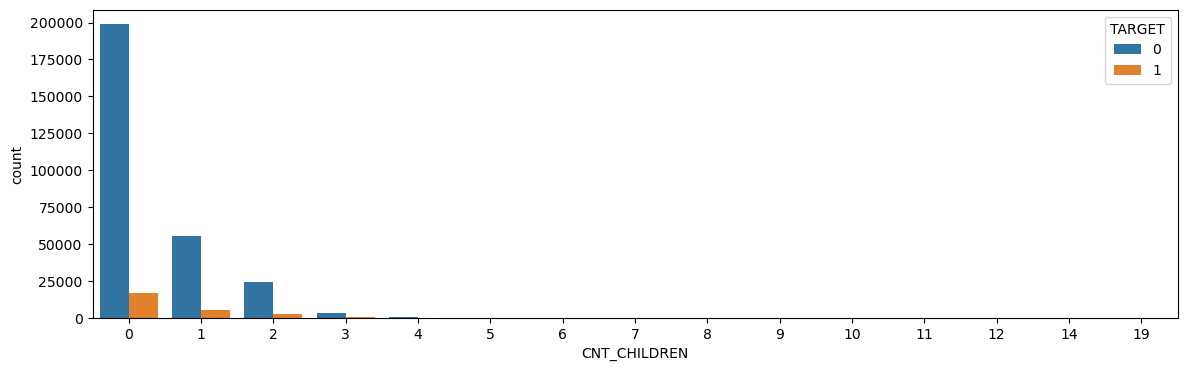

In [74]:
plt.figure(figsize=[14,4])
sns.countplot(data = app_df, x = "CNT_CHILDREN", hue = "TARGET")

Seems have 19 children is outlier value, but anyway we dont judge. Lets ignore those and look at bigger stats

<div style="background-color: #dcf5de; padding: 10px"><b style="color: green">Observation Insight</b>: Client who have less children are more likely to payoff their debts. Lower the number of children, higher is the probability of client being ideal candidate</div>

Lets analyse <b>client's incomes</b>

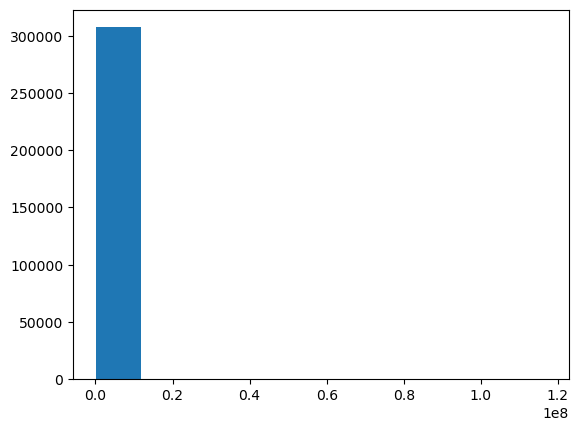

In [78]:
plt.hist(app_df.AMT_INCOME_TOTAL, bins=10)
plt.show()

Above graph is all messed up, lets check why

In [81]:
app_df.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [83]:
app_df.AMT_INCOME_TOTAL.min()

25650.0

In [84]:
app_df.AMT_INCOME_TOTAL.max()

117000000.0

it seems there are clients with high income group. We can not remove those entries as banks have high profile candidates also.
So it would be better if we bin values. Which should given more insight about different income groups too

In [86]:
help(app_df.AMT_INCOME_TOTAL.quantile)

Help on method quantile in module pandas.core.series:

quantile(q=0.5, interpolation='linear') method of pandas.core.series.Series instance
    Return value at the given quantile.
    
    Parameters
    ----------
    q : float or array-like, default 0.5 (50% quantile)
        The quantile(s) to compute, which can lie in range: 0 <= q <= 1.
    interpolation : {'linear', 'lower', 'higher', 'midpoint', 'nearest'}
        This optional parameter specifies the interpolation method to use,
        when the desired quantile lies between two data points `i` and `j`:
    
            * linear: `i + (j - i) * fraction`, where `fraction` is the
              fractional part of the index surrounded by `i` and `j`.
            * lower: `i`.
            * higher: `j`.
            * nearest: `i` or `j` whichever is nearest.
            * midpoint: (`i` + `j`) / 2.
    
    Returns
    -------
    float or Series
        If ``q`` is an array, a Series will be returned where the
        index is ``q

In [87]:
help(pd.cut)

Help on function cut in module pandas.core.reshape.tile:

cut(x, bins, right: 'bool' = True, labels=None, retbins: 'bool' = False, precision: 'int' = 3, include_lowest: 'bool' = False, duplicates: 'str' = 'raise', ordered: 'bool' = True)
    Bin values into discrete intervals.
    
    Use `cut` when you need to segment and sort data values into bins. This
    function is also useful for going from a continuous variable to a
    categorical variable. For example, `cut` could convert ages to groups of
    age ranges. Supports binning into an equal number of bins, or a
    pre-specified array of bins.
    
    Parameters
    ----------
    x : array-like
        The input array to be binned. Must be 1-dimensional.
    bins : int, sequence of scalars, or IntervalIndex
        The criteria to bin by.
    
        * int : Defines the number of equal-width bins in the range of `x`. The
          range of `x` is extended by .1% on each side to include the minimum
          and maximum values 

In [90]:
app_df["income_group"]= pd.cut(app_df.AMT_INCOME_TOTAL,[0, 50000, 100000, 150000, 200000, 250000, 500000, 750000, 100000000], labels= ["<50k","50k-1L","1-1.5L","1.5-2L", "2-2.5L", "2.5-5L", "5-7.5L", "7.5L+"])

In [92]:
app_df.income_group.value_counts()

1-1.5L    91591
1.5-2L    64307
50k-1L    59181
2-2.5L    48137
2.5-5L    37076
<50k       4517
5-7.5L     2058
7.5L+       643
Name: income_group, dtype: int64

<AxesSubplot:>

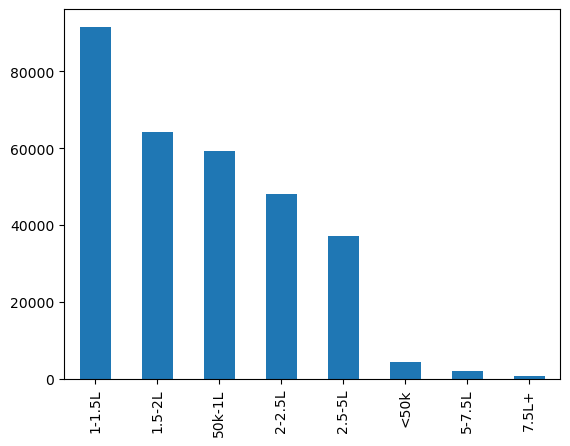

In [93]:
app_df.income_group.value_counts().plot.bar()

<b>Observation</b>: It seems we have more application from clients who have income in range 1 lakh to 1.5 lakh

lets see defaulters in those income groups

<AxesSubplot:xlabel='TARGET', ylabel='AMT_CREDIT'>

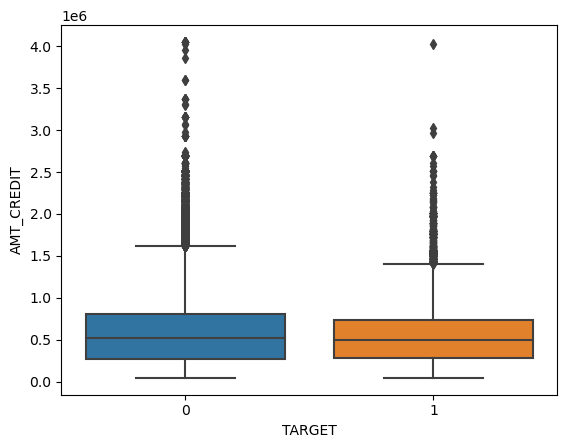

In [136]:
sns.boxplot(data=app_df,x="TARGET", y="AMT_CREDIT")

Lets try plotting different type of chart

<AxesSubplot:xlabel='income_group', ylabel='count'>

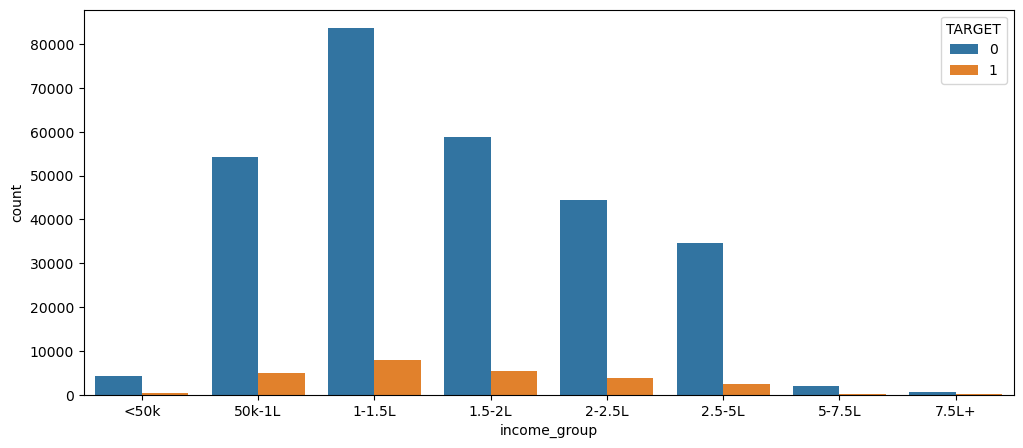

In [124]:
plt.figure(figsize=[12, 5])
sns.countplot(data = app_df, x = "income_group", hue = "TARGET")

<div style="background-color: #dcf5de; padding: 10px"><b style="color: green">Observation Insight</b>: Most efficient income group is with income in range of 1 to 1.5 lakh</div>

Next column is <b>AMT_CREDIT</b> i.e. credit amount of the loan, lets see what effect it have

In [114]:
# first lets bin the credit amount

bins = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000,10000000]
labels = ['0-1L','1-2L', '2-3L','3-4L','4-5L','5-6L','6-7L','7-8L', '8-9L','9-10L', '10L Above']
app_df['loan_amt_range']=pd.cut(app_df['AMT_CREDIT'],bins=bins,labels=labels)

In [115]:
app_df['loan_amt_range'].value_counts()

2-3L         54813
10L Above    49985
5-6L         34232
4-5L         32038
1-2L         30140
3-4L         26338
6-7L         24049
8-9L         21792
7-8L         19193
9-10L         8927
0-1L          6004
Name: loan_amt_range, dtype: int64

In [116]:
# instead of number, lets see percentage wise for more better clarity
app_df['loan_amt_range'].value_counts(normalize=True)

2-3L         0.178247
10L Above    0.162547
5-6L         0.111320
4-5L         0.104185
1-2L         0.098013
3-4L         0.085649
6-7L         0.078205
8-9L         0.070866
7-8L         0.062414
9-10L        0.029030
0-1L         0.019525
Name: loan_amt_range, dtype: float64

<AxesSubplot:ylabel='loan_amt_range'>

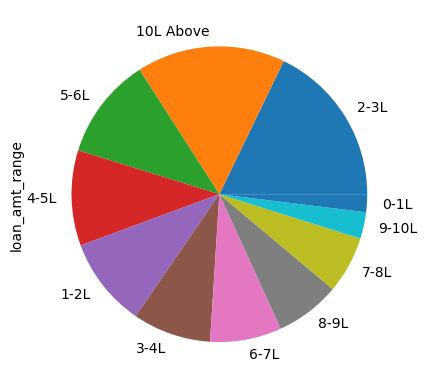

In [118]:
# we havent plotted any pie charts yet.. lets have some pie
app_df['loan_amt_range'].value_counts(normalize=True).plot.pie()

<b>observation</b>: Compared to other loan amounts, most people have taken loan in group 2-3L and 10 lakh above.

lets analyse what different client income types are doing

In [119]:
app_df.NAME_INCOME_TYPE.value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Working'),
  Text(1, 0, 'State servant'),
  Text(2, 0, 'Commercial associate'),
  Text(3, 0, 'Pensioner'),
  Text(4, 0, 'Unemployed'),
  Text(5, 0, 'Student'),
  Text(6, 0, 'Businessman'),
  Text(7, 0, 'Maternity leave')])

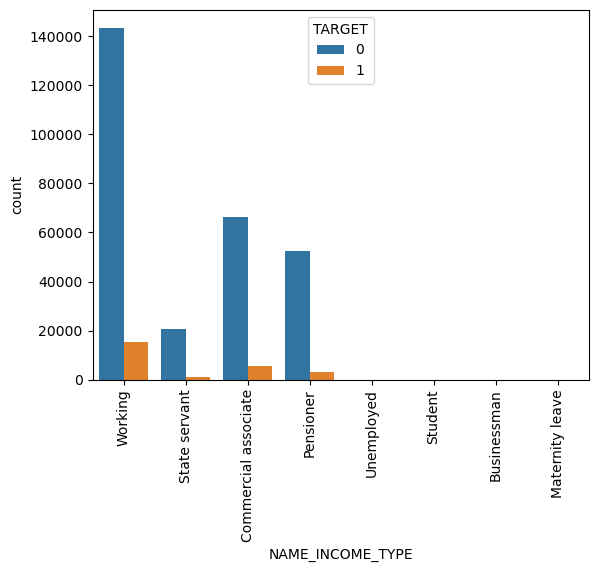

In [126]:
sns.countplot(data = app_df, x = "NAME_INCOME_TYPE", hue = "TARGET")
plt.xticks(rotation=90)

<div style="background-color: #dcf5de; padding: 10px"><b style="color: green">Observation Insight</b>: As always, working people are being good citizen and paying off their debts.</div>

Lets see how <b>education</b> plays its part

<AxesSubplot:ylabel='NAME_EDUCATION_TYPE'>

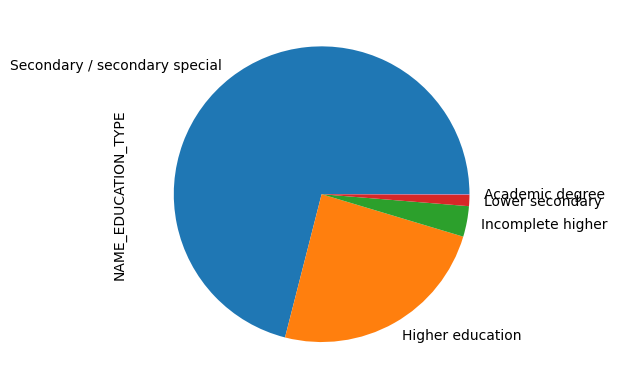

In [130]:
app_df.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.pie()

<b>observation</b>: Can see most of the people who applied for loan are of having education secondary/secondary special

lets see which education group have most defaulters

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Secondary / secondary special'),
  Text(1, 0, 'Higher education'),
  Text(2, 0, 'Incomplete higher'),
  Text(3, 0, 'Lower secondary'),
  Text(4, 0, 'Academic degree')])

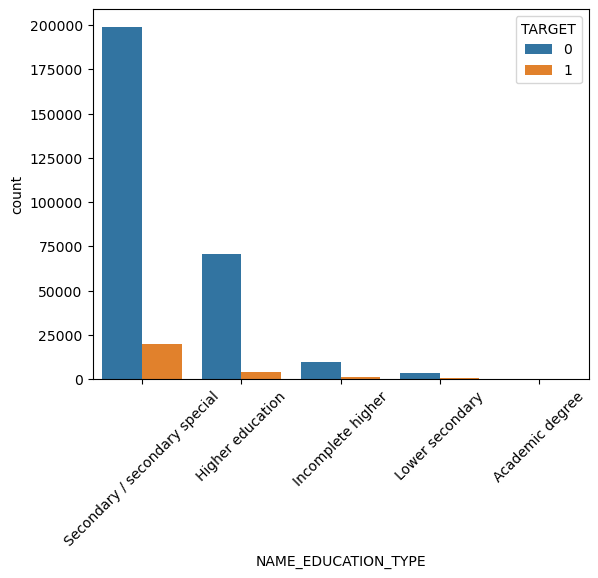

In [132]:
sns.countplot(data = app_df, x = "NAME_EDUCATION_TYPE", hue = "TARGET")
plt.xticks(rotation=45)

<b>Observation</b>: most efficient group to not become defaulters are Secondary / secondary special

Lets check correlation between credit and income

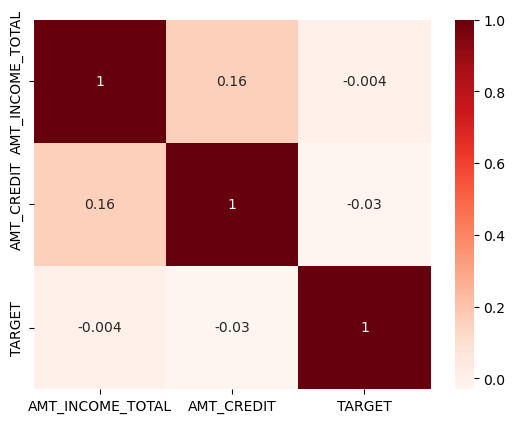

In [137]:
sns.heatmap( app_df[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'TARGET']].corr(), annot= True, cmap= "Reds")
plt.show()

## Import previous application data

Lets now import and inspect previous application data

In [139]:
prev_df = pd.read_csv('previous_application.csv')

In [140]:
prev_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


As we can assume from column description, NAME_CONTRACT_STATUS is something we will be more interested in. As it shows what happened with previous application. Lets see later if we find more interesting things.

In [142]:
prev_df.shape

(1670214, 37)

In [141]:
prev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

Data types of columns seems okay when compared with provided column description file. Lets tackle any situation later if we need it. Lets proceed with Data cleanup

## Data Cleanup of Previous application

lets find null values in prev app data

In [144]:
prev_df.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

lets see null values in percentages

In [146]:
prev_df.isnull().sum() * 100 / prev_df.shape[0]

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

As per checking above columns with provided column descriptions, all of the columns having > 40% null values seems to be of no use to us in analysis. So instead of imputing those values lets get rid of them

In [147]:
prev_df = prev_df[prev_df.columns[prev_df.isnull().mean() < 0.4]]

In [148]:
# lets verify columns percentage wise, and see what are remained

prev_df.isnull().sum() * 100 / prev_df.shape[0]

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

Lets check empty value column AMT_ANNUITY

In [149]:
prev_df.AMT_ANNUITY.describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

<AxesSubplot:>

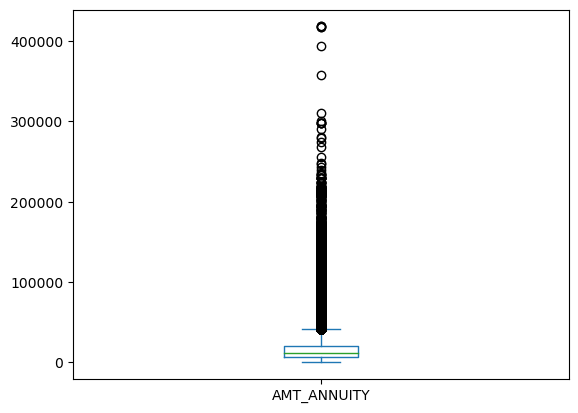

In [150]:
prev_df.AMT_ANNUITY.plot.box()

same as application data, most of the values are around bottom of box plot, so it makes sense to fill na values with median instead of mean.

In [151]:
prev_df.AMT_ANNUITY = prev_df.AMT_ANNUITY.fillna(prev_df.AMT_ANNUITY.median())

Next column "AMT_GOODS_PRICE"

In [152]:
prev_df.AMT_GOODS_PRICE.describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

<AxesSubplot:>

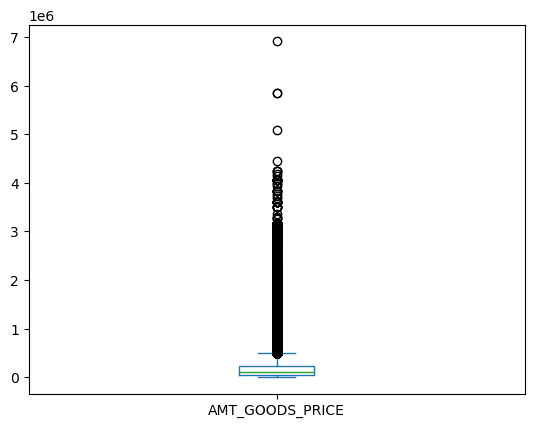

In [153]:
prev_df.AMT_GOODS_PRICE.plot.box()

same as above, lets fill NAs with median

In [155]:
prev_df.AMT_GOODS_PRICE = prev_df.AMT_GOODS_PRICE.fillna(prev_df.AMT_GOODS_PRICE.median())

Lets see what columns remained for NAs

In [156]:
prev_df.isnull().sum() * 100 / prev_df.shape[0]

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                     0.000000
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                 0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

Now sizable empty value column is "CNT_PAYMENT"

In [157]:
prev_df.CNT_PAYMENT.describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

From checking column description, this column shows what was terms of credit in previous application. As stated at start, we would need to explore things with outcome status of application too. So lets see what happned with those applications.

<AxesSubplot:ylabel='NAME_CONTRACT_STATUS'>

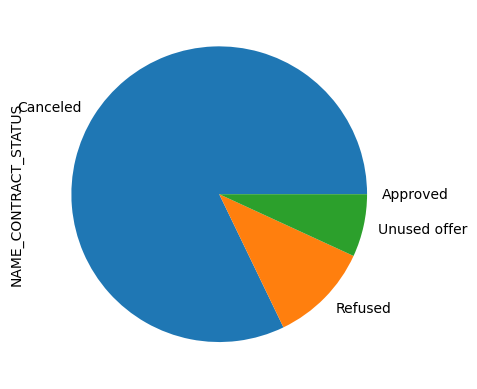

In [163]:
prev_df.loc[prev_df['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts().plot.pie()

<b>Observation</b>: As we can clearly see here, almost all applications were not started. So there is no chance that user made payments. So lets impute those empty values with 0.

In [164]:
prev_df['CNT_PAYMENT'].fillna(0,inplace = True)

Lets see whats the status of nulls

In [165]:
prev_df.isnull().sum()

SK_ID_PREV                       0
SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
AMT_ANNUITY                      0
AMT_APPLICATION                  0
AMT_CREDIT                       1
AMT_GOODS_PRICE                  0
WEEKDAY_APPR_PROCESS_START       0
HOUR_APPR_PROCESS_START          0
FLAG_LAST_APPL_PER_CONTRACT      0
NFLAG_LAST_APPL_IN_DAY           0
NAME_CASH_LOAN_PURPOSE           0
NAME_CONTRACT_STATUS             0
DAYS_DECISION                    0
NAME_PAYMENT_TYPE                0
CODE_REJECT_REASON               0
NAME_CLIENT_TYPE                 0
NAME_GOODS_CATEGORY              0
NAME_PORTFOLIO                   0
NAME_PRODUCT_TYPE                0
CHANNEL_TYPE                     0
SELLERPLACE_AREA                 0
NAME_SELLER_INDUSTRY             0
CNT_PAYMENT                      0
NAME_YIELD_GROUP                 0
PRODUCT_COMBINATION            346
dtype: int64

In [169]:
prev_df[prev_df.AMT_CREDIT.isna()]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
1127152,2204450,438387,Revolving loans,0.0,0.0,NaN,112320.0,FRIDAY,10,Y,...,Repeater,XNA,Cards,walk-in,Country-wide,20,Connectivity,0.0,XNA,Card Street


In [170]:
prev_df[prev_df.AMT_CREDIT.isna()]["NAME_CONTRACT_STATUS"]

1127152    Approved
Name: NAME_CONTRACT_STATUS, dtype: object

In [168]:
prev_df[prev_df.AMT_CREDIT.isna()]["AMT_APPLICATION"]

1127152    0.0
Name: AMT_APPLICATION, dtype: float64

<b>observation</b>:
<p>As we can clearly see, The row with AMT_CREDIT seems to have corrupted as it does not make any sense. Why would someone make application for zero (0) amount and then get loan "approved" with null value.</p>
<p>Lets remove that row</p>

In [171]:
prev_df.shape

(1670214, 26)

In [174]:
prev_df = prev_df[~prev_df.AMT_CREDIT.isna()]

In [176]:
# lets verify if size became less than only single entry
prev_df.shape

(1670213, 26)

good, now lets check other nulls

In [177]:
prev_df.isnull().sum()

SK_ID_PREV                       0
SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
AMT_ANNUITY                      0
AMT_APPLICATION                  0
AMT_CREDIT                       0
AMT_GOODS_PRICE                  0
WEEKDAY_APPR_PROCESS_START       0
HOUR_APPR_PROCESS_START          0
FLAG_LAST_APPL_PER_CONTRACT      0
NFLAG_LAST_APPL_IN_DAY           0
NAME_CASH_LOAN_PURPOSE           0
NAME_CONTRACT_STATUS             0
DAYS_DECISION                    0
NAME_PAYMENT_TYPE                0
CODE_REJECT_REASON               0
NAME_CLIENT_TYPE                 0
NAME_GOODS_CATEGORY              0
NAME_PORTFOLIO                   0
NAME_PRODUCT_TYPE                0
CHANNEL_TYPE                     0
SELLERPLACE_AREA                 0
NAME_SELLER_INDUSTRY             0
CNT_PAYMENT                      0
NAME_YIELD_GROUP                 0
PRODUCT_COMBINATION            346
dtype: int64

In [178]:
prev_df.PRODUCT_COMBINATION.head()

0    POS mobile with interest
1            Cash X-Sell: low
2           Cash X-Sell: high
3         Cash X-Sell: middle
4           Cash Street: high
Name: PRODUCT_COMBINATION, dtype: object

In [179]:
prev_df.PRODUCT_COMBINATION.value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112581
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

These value are random and no logic we can use to impute. Also as the percentage is very less (0.02%). lets keep those values as is. if needed we can tackle that later

In [180]:
prev_df.isnull().sum() * 100 / prev_df.shape[0]

SK_ID_PREV                     0.000000
SK_ID_CURR                     0.000000
NAME_CONTRACT_TYPE             0.000000
AMT_ANNUITY                    0.000000
AMT_APPLICATION                0.000000
AMT_CREDIT                     0.000000
AMT_GOODS_PRICE                0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
HOUR_APPR_PROCESS_START        0.000000
FLAG_LAST_APPL_PER_CONTRACT    0.000000
NFLAG_LAST_APPL_IN_DAY         0.000000
NAME_CASH_LOAN_PURPOSE         0.000000
NAME_CONTRACT_STATUS           0.000000
DAYS_DECISION                  0.000000
NAME_PAYMENT_TYPE              0.000000
CODE_REJECT_REASON             0.000000
NAME_CLIENT_TYPE               0.000000
NAME_GOODS_CATEGORY            0.000000
NAME_PORTFOLIO                 0.000000
NAME_PRODUCT_TYPE              0.000000
CHANNEL_TYPE                   0.000000
SELLERPLACE_AREA               0.000000
NAME_SELLER_INDUSTRY           0.000000
CNT_PAYMENT                    0.000000
NAME_YIELD_GROUP               0.000000


In [ ]:
##